In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [74]:
data = pd.read_csv('Life Expectancy Data.csv')
data.columns = data.columns.str.strip().str.lower()

In [75]:
data.value_counts()

country      year  status      life expectancy  adult mortality  infant deaths  alcohol  percentage expenditure  hepatitis b  measles  bmi   under-five deaths  polio  total expenditure  diphtheria  hiv/aids  gdp          population  thinness  1-19 years  thinness 5-9 years  income composition of resources  schooling
Afghanistan  2000  Developing  54.8             321.0            88             0.01     10.424960               62.0         6532     12.2  122                24.0   8.20               24.0        0.1       114.560000   293756.0    2.3                   2.5                 0.338                            5.5          1
Nicaragua    2005  Developing  71.2             194.0            3              3.70     218.571618              86.0         0        46.4  4                  87.0   6.11               86.0        0.3       1175.116225  5379328.0   2.0                   1.9                 0.592                            11.0         1
Niger        2009  Developing  57.1 

In [76]:
data.head()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


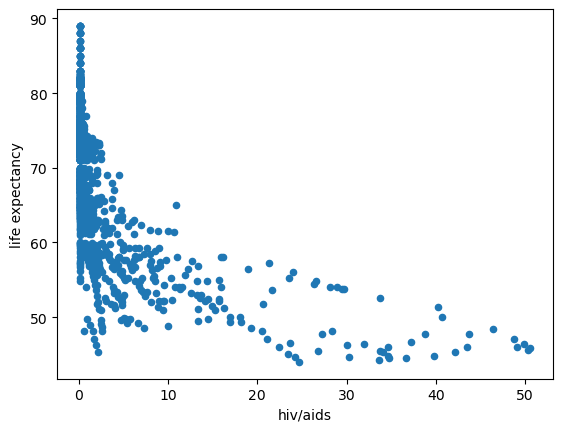

In [66]:
data.plot(x='hiv/aids', y='life expectancy', kind='scatter')
plt.show()


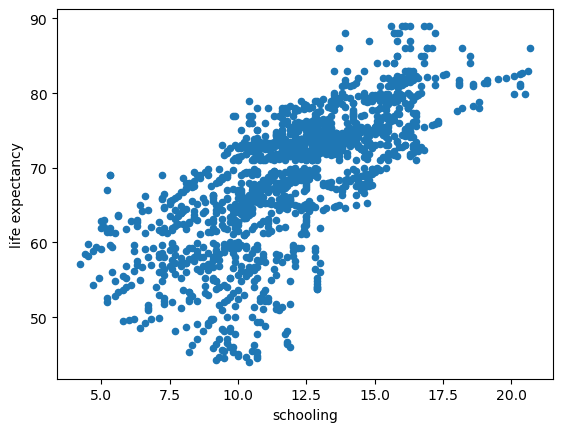

In [67]:
data.plot(x='schooling', y='life expectancy', kind = 'scatter')
plt.show()

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          1649 non-null   object 
 1   year                             1649 non-null   int64  
 2   status                           1649 non-null   object 
 3   life expectancy                  1649 non-null   float64
 4   adult mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   hepatitis b                      1649 non-null   float64
 9   measles                          1649 non-null   int64  
 10  bmi                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  polio               

In [78]:
school_life = data[['schooling', 'life expectancy']]
school_life = school_life.dropna()

In [82]:
corr, pvalue = stats.pearsonr(school_life['schooling'], school_life['life expectancy'])

print("The correlation coefficient is: ", round(corr,2))
print("The p-value is: ", pvalue)

The correlation coefficient is:  0.75
The p-value is:  0.0


In [81]:
X_sa_reg = school_life['schooling'].dropna().to_numpy() #independent variable
X_sa_reg = X_sa_reg.reshape(-1, 1)

y_sa_reg = school_life['life expectancy'].dropna().to_numpy()  #dependent variable
y_sa_reg = y_sa_reg.reshape(-1, 1)


lr_model = LinearRegression(fit_intercept=True) #initialize the regression model
lr_model = lr_model.fit(X_sa_reg, y_sa_reg)                   #fit the data to the model i.e. find the line of best fit

#display the parameters for the slope and intercept
print('The intercept is: ', lr_model.intercept_[0])
print('The slope is: ', lr_model.coef_[0,0])

The intercept is:  44.10888913291285
The slope is:  2.1034531049254026
